# Understanding of RNN

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## A first recurrent layer in Keras

In [2]:
from keras.layers import SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/5





20000/20000 [==============================] - 31s 2ms/step - loss: 0.6410 - acc: 0.6167 - val_loss: 0.4969 - val_acc: 0.7744
Epoch 2/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.4085 - acc: 0.8257 - val_loss: 0.4265 - val_acc: 0.8116
Epoch 3/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3031 - acc: 0.8786 - val_loss: 0.3551 - val_acc: 0.8498
Epoch 4/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2235 - acc: 0.9153 - val_loss: 0.4253 - val_acc: 0.8206
Epoch 5/5
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1528 - acc: 0.9446 - val_loss: 0.4284 - val_acc: 0.8304


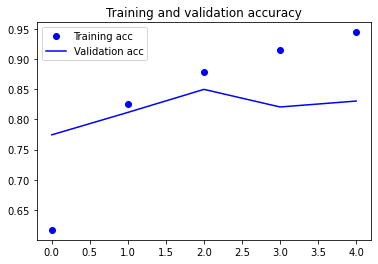

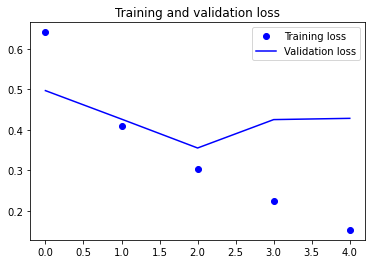

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### A concrete LSTM example in Keras

In [12]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.5116 - acc: 0.7565 - val_loss: 0.3458 - val_acc: 0.8622
Epoch 2/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.3106 - acc: 0.8764 - val_loss: 0.3696 - val_acc: 0.8428
Epoch 3/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.2430 - acc: 0.9079 - val_loss: 1.7191 - val_acc: 0.5632
Epoch 4/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.2069 - acc: 0.9258 - val_loss: 0.3039 - val_acc: 0.8840
Epoch 5/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.1803 - acc: 0.9347 - val_loss: 0.3018 - val_acc: 0.8816
Epoch 6/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.1614 - acc: 0.9424 - val_loss: 0.7913 - val_acc: 0.7960
Epoch 7/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1515 - acc: 0.9480 - val_loss: 0.3305 - v

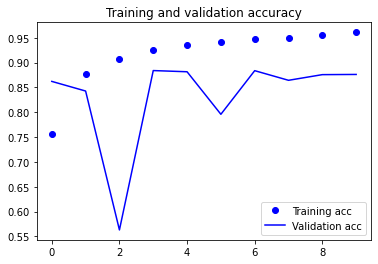

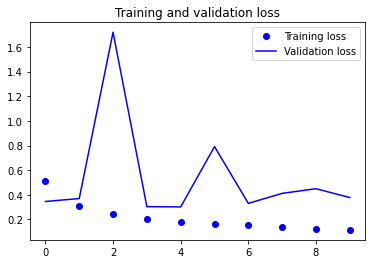

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()